<a href="https://colab.research.google.com/github/skymined/study_AIs/blob/main/docs/quests/NLPs/classification_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글화

In [1]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.4 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

## 데이터 준비

In [5]:
import pandas as pd
df_news = pd.read_excel("IT News.xlsx", sheet_name=None)
len(df_news)

45

In [42]:
sheet_list =[]
for i, df in df_news.items():
  sheet_list.append(df['문장 요약'])
sheet_list[0]

0     정부가 맞춤형 광고에 사용되는 개인정보 처리 투명성을 높인다. 앞으로 광고 사업자와...
1     카카오톡 선물하기에서 선물 받은 모바일 교환권을 삼성페이와 연동할 수 있다. 선물함...
2     KAIST는 이상완 뇌인지과학과 교수 연구팀이 인간의 빠른 추론 능력을 유도해 인과...
3     인간 줄기세포로 만든 뇌조직(미니 뇌)을 전자칩에 연결한 '브레인웨이'를 구축해 간...
4     네이버페이와 카카오페이(377300)가 '전월세대출 갈아타기' 서비스를 출시한다고 ...
5     카카오의 위치 기반 라이프플랫폼 카카오맵은 백화점, 아울렛, 대형 쇼핑몰 등 국내 ...
6     사람의 뇌에 칩을 심어 질병과 장애를 극복하는 공상과학(SF) 영화가 현실이 되고 ...
7                                                   NaN
8                                                   NaN
9               중고거래 플랫폼 사용량의 급증으로 중고물품 피해사례도 급증하고 있다. 
10    프랑스·독일의 음악가 열에 일곱은 생성형 인공지능(AI)으로 생계에 위협을 느낀다는...
11                                                  NaN
12                                                  NaN
13    AI 모델들이 저작물을 무단 학습하는 것을 막기 위한 '나이트셰이드(Nightsha...
14                                                  NaN
Name: 문장 요약, dtype: object

In [54]:
# nan 값들 지우기
for j in range(len(sheet_list)):
  sheet_list[j].dropna(inplace=True)
sheet_list[2]

0     테슬라가 해킹대회를 개최하였는데 한 보안업체 팀이 테슬라의 보안을 해킹하는데 성공했다.
6    올해 주목할 만한 바이오산업의 핵심은 △AI(인공지능) △비만치료제(GLP-1) △...
9      딥페이크 기술을 사용한 피해가 커지고 있어, 뒤늦게 딥페이크 규제에 들어갈 방향이다.
Name: 문장 요약, dtype: object

In [83]:
sentence_list =[]
for i in sheet_list :
    sentence_list.extend(i.values)
sentence_list

['정부가 맞춤형 광고에 사용되는 개인정보 처리 투명성을 높인다. 앞으로 광고 사업자와 광고 매체 사업자는 종전보다 명확한 개인정보 처리 규정을 지켜야 한다. 이용자는 자신의 정보가 어떻게 이용됐는지 구체적으로 확인할 수 있다. 정부는 민·관 협의체를 구성해 정보 처리 투명성을 더 높일 계획이다.',
 '카카오톡 선물하기에서 선물 받은 모바일 교환권을 삼성페이와 연동할 수 있다. 선물함에서 모바일 교환권 하단의 삼성페이 버튼만 누르면 삼성페이에 자동 저장된다.',
 'KAIST는 이상완 뇌인지과학과 교수 연구팀이 인간의 빠른 추론 능력을 유도해 인과관계의 학습 효율을 향상할 수 있는 뇌 기반 인공지능 기술 개발에 성공했다고 31일 밝혔다.',
 "인간 줄기세포로 만든 뇌조직(미니 뇌)을 전자칩에 연결한 '브레인웨이'를 구축해 간단한 계산 작업을 수행하는데 성공했다.",
 "네이버페이와 카카오페이(377300)가 '전월세대출 갈아타기' 서비스를 출시한다고 31일 밝혔다. 앞서 양사는 지난 9일 '주택담보대출 갈아타기' 서비스를 동시에 내놓은 바 있다.",
 '카카오의 위치 기반 라이프플랫폼 카카오맵은 백화점, 아울렛, 대형 쇼핑몰 등 국내 주요 복합상업시설 100여곳에 대한 실내지도 서비스를 실시한다고 31일 밝혔다.',
 '사람의 뇌에 칩을 심어 질병과 장애를 극복하는 공상과학(SF) 영화가 현실이 되고 있다.머스크는 29일 X에 “어제 칩 이식을 받은 환자가 잘 회복하고 있다”며 “뉴런(신경세포)의 신호인 스파이크가 감지되는 등 초기 결과는 양호한 편”이라고 했다. ',
 '중고거래 플랫폼 사용량의 급증으로 중고물품 피해사례도 급증하고 있다. ',
 '프랑스·독일의 음악가 열에 일곱은 생성형 인공지능(AI)으로 생계에 위협을 느낀다는 여론조사 결과가 30일(현지시간) 공개됐다.',
 "AI 모델들이 저작물을 무단 학습하는 것을 막기 위한 '나이트셰이드(Nightshade)'라는 소프트웨어 도구를 공개했다.",
 '인공지능(AI)이 장문의 정보공개 청구 내용을

### 데이터 전처리

In [85]:
# 명사 추출
!pip install python-mecab-ko

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.9/573.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 35.3 MB/s eta 0:00:00


In [86]:
from mecab import MeCab
mecab = MeCab()

In [93]:
noun_list = []
for i in sentence_list :
  sen = mecab.nouns(i)
  noun_list.append(' '.join(sen))
type(noun_list)

list

In [96]:
import pickle
with open('tfidfVectorizer.pkl', 'rb') as f:
  vectorize_model =pickle.load(f)

In [99]:
vectorize_noun_list = vectorize_model.transform(noun_list)
vectorize_noun_list

<317x27288 sparse matrix of type '<class 'numpy.float64'>'
	with 3733 stored elements in Compressed Sparse Row format>

### 모델

In [102]:
import pickle
with open('randomForestClassifier.pkl', 'rb') as f :
  randomforest_model = pickle.load(f)

In [104]:
array_model = randomforest_model.predict(vectorize_noun_list)
array_model

array([2., 0., 0., 0., 1., 0., 0., 2., 4., 2., 0., 2., 0., 0., 4., 2., 2.,
       0., 2., 0., 4., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 2., 0., 1., 2., 1., 0., 0., 1., 4., 2., 0., 0., 0.,
       2., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 1., 0., 6., 2., 0., 0.,
       0., 2., 2., 1., 2., 2., 1., 0., 0., 0., 0., 0., 1., 0., 3., 1., 0.,
       1., 1., 4., 2., 1., 6., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 2.,
       0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 0., 0., 2., 2., 0., 4.,
       0., 4., 0., 0., 2., 1., 0., 0., 0., 1., 0., 1., 6., 1., 0., 0., 0.,
       2., 0., 0., 0., 0., 2., 0., 0., 1., 6., 1., 6., 0., 2., 1., 0., 1.,
       1., 2., 0., 0., 2., 0., 2., 0., 2., 4., 1., 1., 1., 3., 0., 0., 2.,
       1., 0., 2., 1., 4., 0., 1., 0., 6., 0., 6., 6., 3., 0., 0., 1., 3.,
       4., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 3., 0., 0., 2., 1., 2.,
       0., 0., 2., 2., 1., 3., 4., 0., 4., 2., 0., 0., 0., 0., 2., 0., 0.,
       1., 2., 1., 6., 1.

## 서비스

In [106]:
topic_dict={
0	: 'IT과학',
1	: '경제',
2	: '사회',
3 :	'생활문화',
4 :	'세계',
5 :	'스포츠',
6 :	'정치'
}

In [107]:
import numpy as np
result = np.empty_like(array_model, dtype=object)
for i in range(len(array_model)) :
  result[i] = topic_dict.get(array_model[i])

In [108]:
result

array(['사회', 'IT과학', 'IT과학', 'IT과학', '경제', 'IT과학', 'IT과학', '사회', '세계',
       '사회', 'IT과학', '사회', 'IT과학', 'IT과학', '세계', '사회', '사회', 'IT과학', '사회',
       'IT과학', '세계', 'IT과학', 'IT과학', '경제', 'IT과학', 'IT과학', 'IT과학', '경제',
       'IT과학', 'IT과학', 'IT과학', 'IT과학', '경제', '경제', 'IT과학', 'IT과학', '경제',
       'IT과학', '사회', 'IT과학', '경제', '사회', '경제', 'IT과학', 'IT과학', '경제', '세계',
       '사회', 'IT과학', 'IT과학', 'IT과학', '사회', 'IT과학', 'IT과학', 'IT과학', '사회',
       'IT과학', 'IT과학', '사회', 'IT과학', 'IT과학', 'IT과학', '경제', 'IT과학', '정치',
       '사회', 'IT과학', 'IT과학', 'IT과학', '사회', '사회', '경제', '사회', '사회', '경제',
       'IT과학', 'IT과학', 'IT과학', 'IT과학', 'IT과학', '경제', 'IT과학', '생활문화', '경제',
       'IT과학', '경제', '경제', '세계', '사회', '경제', '정치', 'IT과학', 'IT과학', 'IT과학',
       '경제', 'IT과학', 'IT과학', 'IT과학', 'IT과학', '경제', 'IT과학', '사회', 'IT과학',
       'IT과학', 'IT과학', 'IT과학', 'IT과학', '사회', 'IT과학', 'IT과학', '경제', 'IT과학',
       'IT과학', 'IT과학', 'IT과학', '사회', '사회', 'IT과학', '세계', 'IT과학', '세계',
       'IT과학', 'IT과학', '사회', '경제', 'IT과학', 'I

### cloud 만들기

In [118]:
!pip install wordcloud
from wordcloud import WordCloud
wordCloud = WordCloud(background_color='white', font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

In [119]:
from collections import Counter
noun_count = Counter(result)
noun_count

Counter({'사회': 61, 'IT과학': 161, '경제': 57, '세계': 18, '정치': 11, '생활문화': 9})

In [120]:
wordCloud.generate_from_frequencies(noun_count)

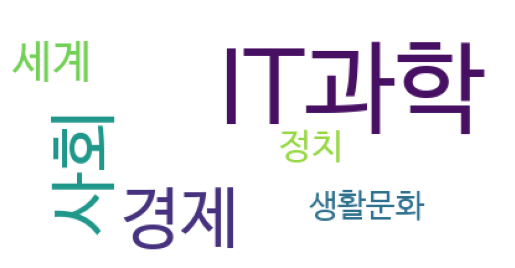

In [121]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()